In [10]:
url='./PDF_FOLDER/adaptive_pooling.pdf'
#url="./PDF_FOLDER/shannon_51.pdf"

In [11]:

import pymupdf # imports the pymupdf library
import pandas as pd 
import fitz  # import PyMuPDF
if not hasattr(fitz.Page, "find_tables"):
    raise RuntimeError("This PyMuPDF version does not support the table feature")
import numpy as np


import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def download_images_per_page():
    

In [12]:
def download_images_from_doc(doc_path):
    doc = pymupdf.open(doc_path)
    num_pages=len(doc)
    print(num_pages)
    DPI = 300  # use this resolution
    title=""
    for page_index in range(num_pages): # iterate over pdf pages
        page = doc[page_index] # get the page
        image_list = page.get_images()
        print(image_list)

        # print the number of images found on the page
        if image_list:
            print(f"Found {len(image_list)} images on page {page_index}")
        else:
            print("No images found on page", page_index)

        for image_index, img in enumerate(image_list, start=1): # enumerate the image list
            xref = img[0] # get the XREF of the image
            pix = pymupdf.Pixmap(doc, xref) # create a Pixmap

            if pix.n - pix.alpha > 3: # CMYK: convert to RGB first
                pix = pymupdf.Pixmap(pymupdf.csRGB, pix)
            
            
            
            # %matplotlib inline
            #pix = item.get_pixmap(dpi=DPI)
            img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
            plt.figure(dpi=DPI)  # set the figure's DPI
            plt.title(title)  # set title of image
            _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))
            
            print('Image:')
            print(type(img))
            
            pix.save("page_%s-image_%s.png" % (page_index, image_index)) # save the image as png
            pix = None
            
    return True

6
[]
No images found on page 0
[(2, 4, 773, 526, 8, 'DeviceRGB', '', 'Im1', 'FlateDecode')]
Found 1 images on page 1
Image:
<class 'numpy.ndarray'>
[(6, 0, 1024, 560, 8, 'DeviceRGB', '', 'Im2', 'FlateDecode')]
Found 1 images on page 2
Image:
<class 'numpy.ndarray'>
[(10, 12, 540, 480, 8, 'DeviceRGB', '', 'Im3', 'FlateDecode')]
Found 1 images on page 3
Image:
<class 'numpy.ndarray'>
[(15, 0, 725, 720, 8, 'DeviceRGB', '', 'Im4', 'FlateDecode')]
Found 1 images on page 4
Image:
<class 'numpy.ndarray'>
[]
No images found on page 5


True

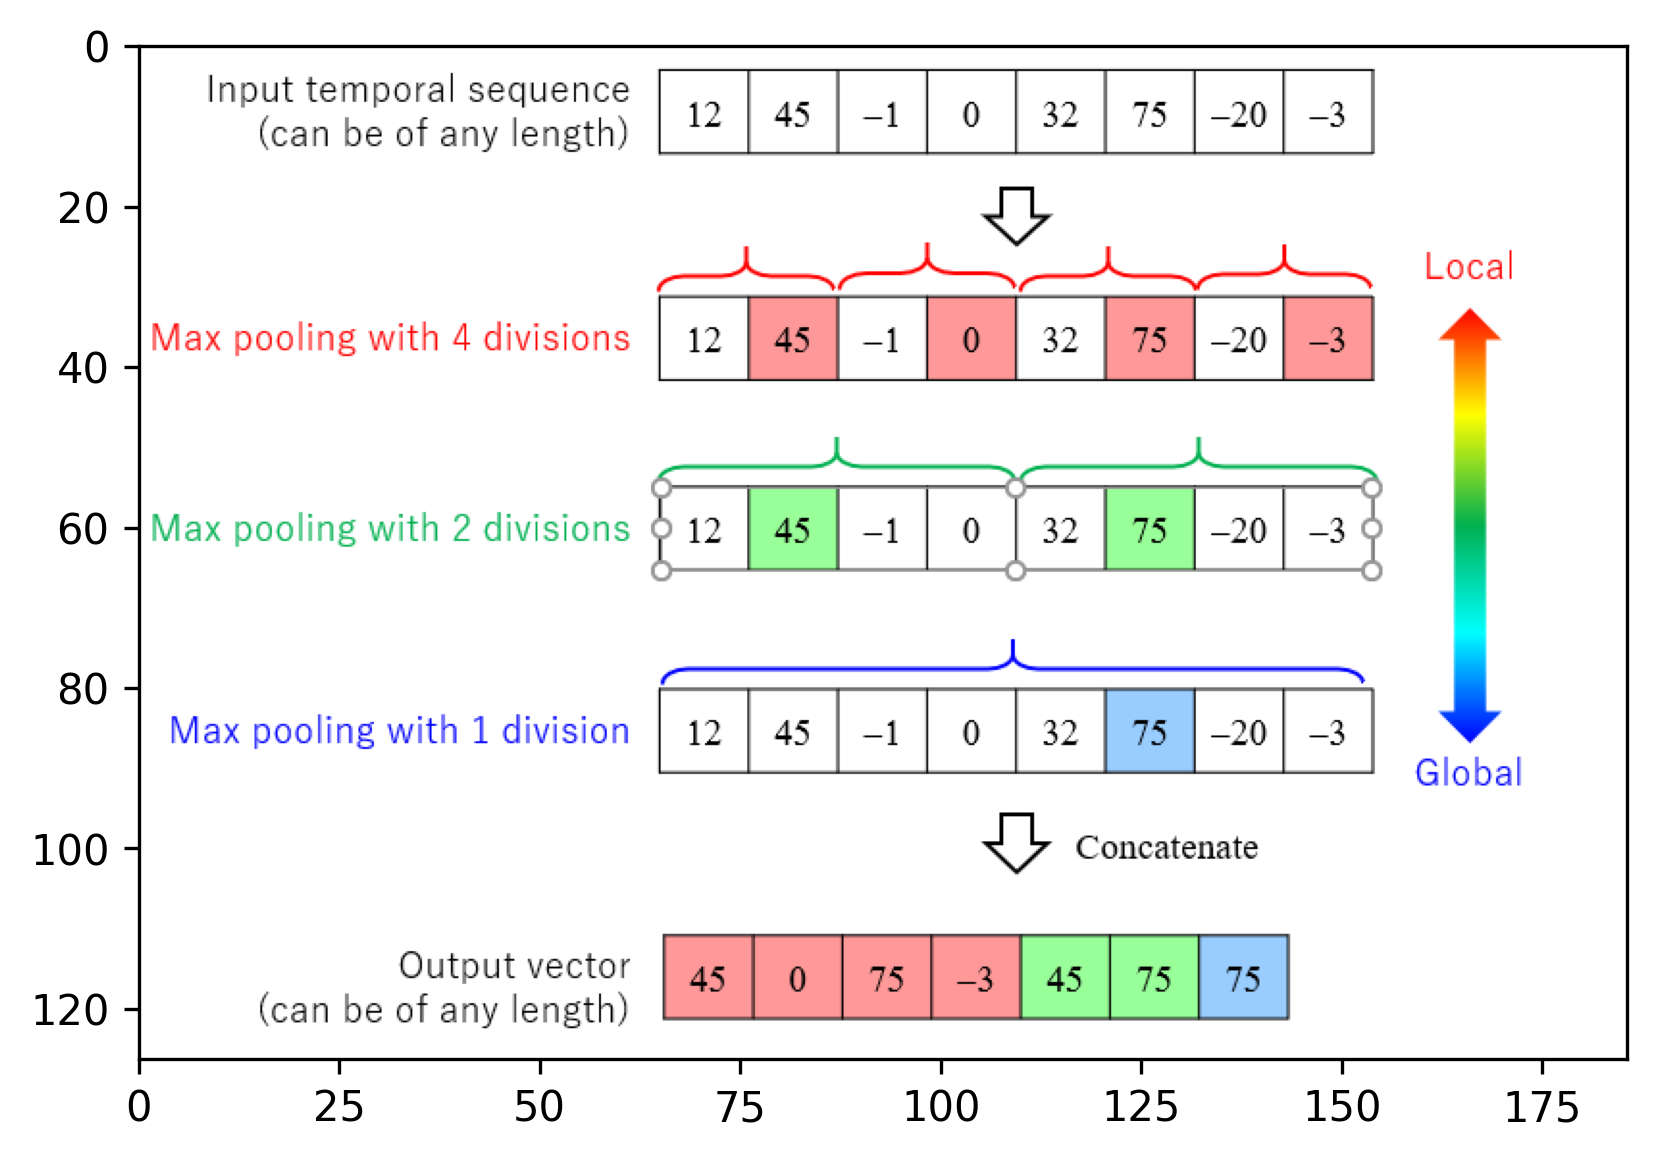

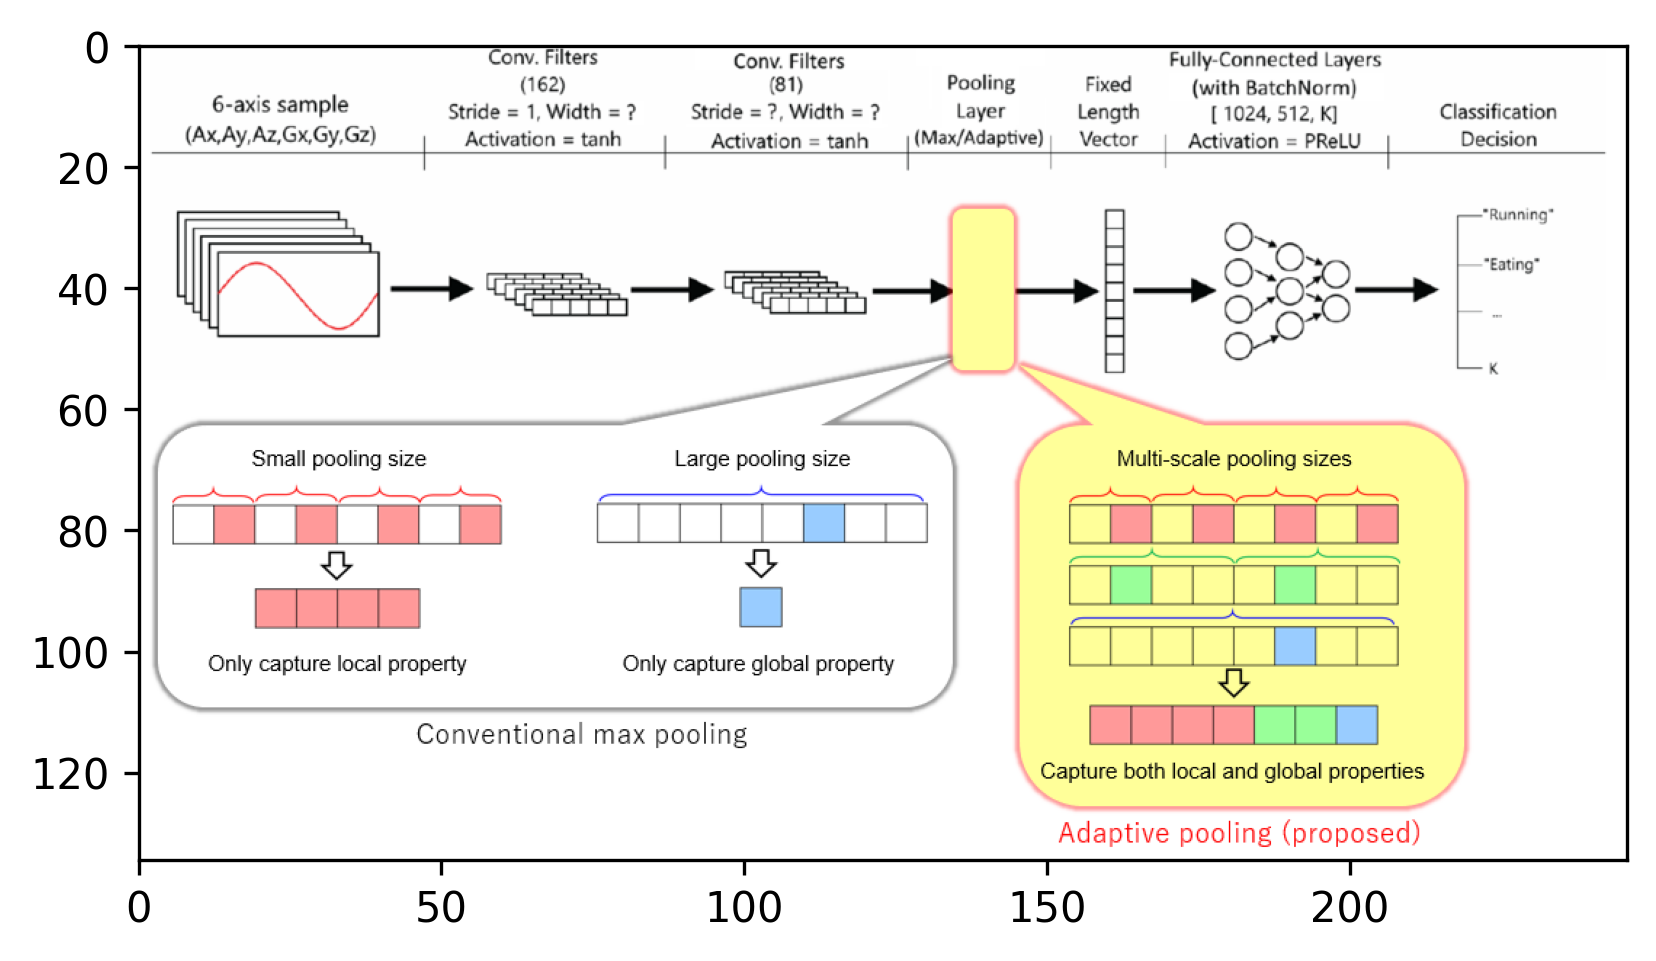

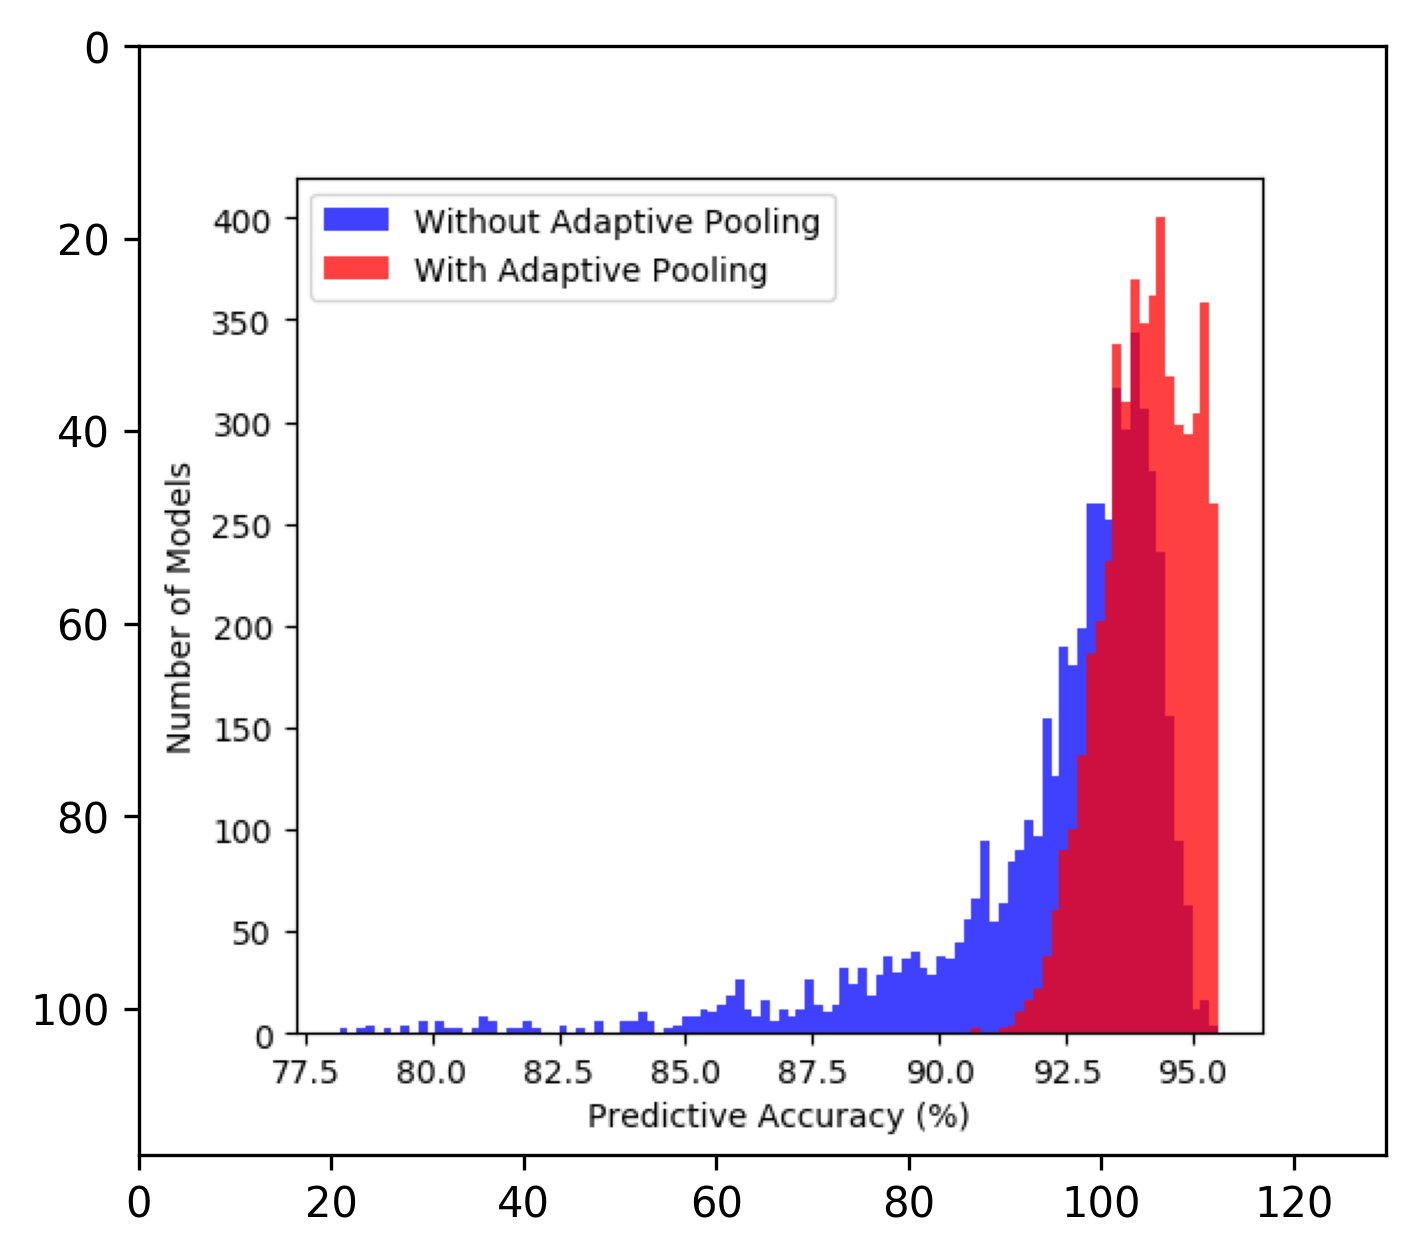

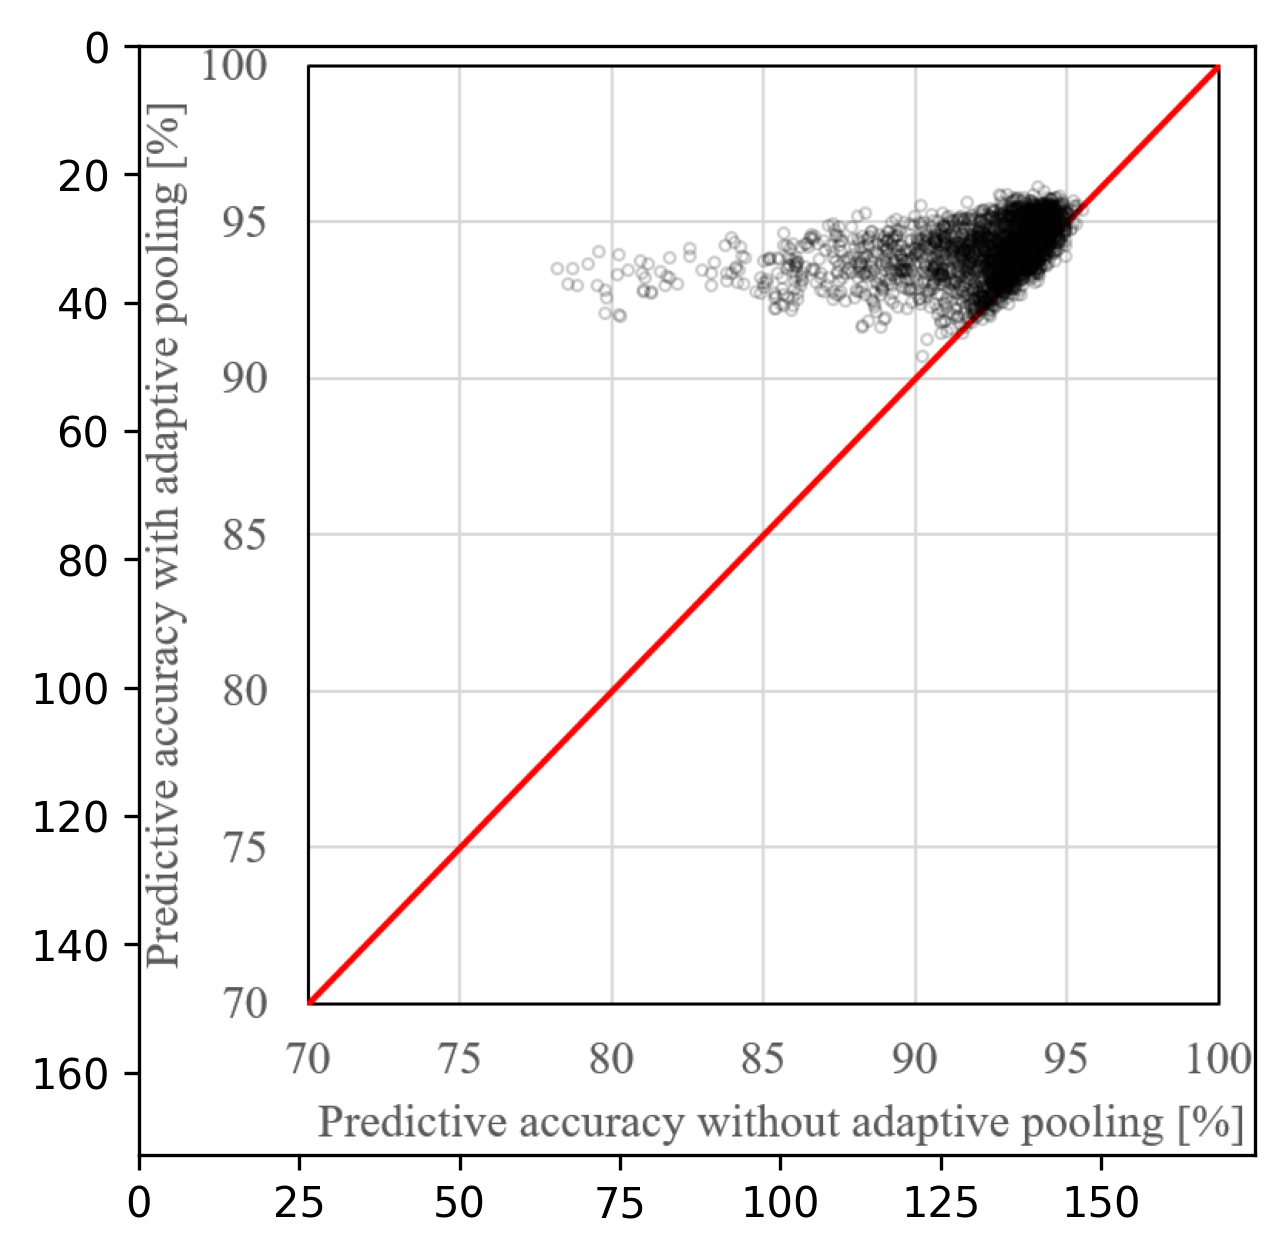

In [13]:
download_images_from_doc(url)

In [14]:
"""
Utility function for showing images.

Intended to be imported in Jupyter notebooks to display pixmap images.

Invocation: "show_image(item, title)", where item is a PyMuPDF object
which has a "get_pixmap" method, and title is an optional string.

The function executes "item.get_pixmap(dpi=150)" and show the resulting
image.


Dependencies
------------
numpy, matplotlib, pymupdf
"""


def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

In [15]:
#doc = pymupdf.open(url)
def extract_images_per_page(doc,page_index,download):
    page_image_dict={}
    page_number=page_index+1
    page = doc[page_index] # get the page by index
    
    ####Get Images along with the metadata of it in the following order:
    #(xref, smask, width, height, bpc, colorspace, alt. colorspace, name, filter, referencer)
    #xref (int) is the image object number
    #smask (int) is the object number of its soft-mask image
    #width and height (ints) are the image dimensions
    #bpc (int) denotes the number of bits per component (normally 8)
    #colorspace (str) a string naming the colorspace (like DeviceRGB)
    #alt. colorspace (str) is any alternate colorspace depending on the value of colorspace
    #name (str) is the symbolic name by which the image is referenced
    #filter (str) is the decode filter of the image (Adobe PDF References, pp. 22).
    #referencer (int) the xref of the referencer. Zero if directly referenced by the page. Only present if full=True.
    
    image_list = page.get_images(full=True) #full=True as it will give the if any other pages are referencing
                                            #the image.
    
    #for image in image_list:
    #    xref, smask, width, height, bpc, colorspace, alt_colorspace, name, filter, referencer=image
    #    print("width")
    #    print(width)
    ###########################################################################################################
    
    img_cnt=len(image_list)
    npy_img_lst=[]
    DPI=150
    title=""
    ###########Extraction Of Images in Numpy Format############
    
    for image_index, img in enumerate(image_list, start=1): # enumerate the image list
        
            img_meta_dict={}
            
            xref = img[0] # get the XREF of the image
            
            smask= img[1] # Get Object number of the Soft Amsk of the Image
            
            width = img[2]
            print("width")
            print(width)
            
            height = img[3]
            print("height")
            print(height)
            
            num_bits = img[4] # Nuber of bits that is being used to represent the smallest component of the image
            colorspace = img[5] #colorspace of the image
            alt_colorspace = img[6] #colorspace of the image
            sym_name = img[7] #Symbolic name of the image
            img_filter = img[8] #decode filter of the image (Adobe PDF References, pp. 22)
            img_ref = img[9] #xref of the referencer. Zero if directly referenced by the page. 
                             #Only present if full=True.
            
            
            img_meta_dict["img_obj_num"]=xref
            img_meta_dict["smask_obj_num"]=smask
            img_meta_dict["width"]=width
            img_meta_dict["height"]=height
            img_meta_dict["num_bits"]=num_bits
            img_meta_dict["colorspace"]=colorspace
            img_meta_dict["alt_colorspace"]=alt_colorspace
            img_meta_dict["sym_name"]=sym_name
            img_meta_dict["filter"]=img_filter
            img_meta_dict["referencer"]=img_ref
            
            
            
            
            
            pix = pymupdf.Pixmap(doc, xref) # create a Pixmap

            if pix.n - pix.alpha > 3: # CMYK: convert to RGB first
                pix = pymupdf.Pixmap(pymupdf.csRGB, pix)
            
            
            
            # %matplotlib inline
            #pix = item.get_pixmap(dpi=DPI)
            img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
            plt.figure(dpi=DPI)  # set the figure's DPI
            plt.title(title)  # set title of image
            _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))
            
            #print('Image:')
            #print(type(img))
            
            img_meta_dict["img_matrix"]=img
            
            npy_img_lst.append(img_meta_dict)
            
            #pix.save("page_%s-image_%s.png" % (page_index, image_index)) # save the image as png
            #pix = None
            
    
    ###########################################################
    
    page_image_dict['page']=page_number
    page_image_dict['img_lst']=image_list
    
    
    
    
    
    page_image_dict['img_cnt']=len(image_list)
    page_image_dict['img_npy_lst']=npy_img_lst
    
    return page_image_dict


def extract_text_tables_images_per_page(doc,doc_img,index,download):
    page_dict={}
    page_image_dict={}
    tab_df_lst=[]
    page = doc[index]
    tabs = page.find_tables()  # detect the tables
    
    ##Extract Images From Pages############
    
    page_image_dict=extract_images_per_page(doc_img,index,download)
    
    print("page_image_dict")
    print(page_image_dict)
    
    
    page_dict['page']=page_image_dict['page']
    page_dict['img_lst']=page_image_dict['img_lst']
    
    
    
    
    
    page_dict['img_cnt']=page_image_dict['img_cnt']
    page_dict['img_npy_lst']=page_image_dict['img_npy_lst']
    
    #######################################
    
    for i,tab in enumerate(tabs):  # iterate over all tables
        for cell in tab.header.cells:
            page.draw_rect(cell,color=fitz.pdfcolor["red"],width=0.3)
        page.draw_rect(tab.bbox,color=fitz.pdfcolor["green"])
        print(f"Table {i} column names: {tab.header.names}, external: {tab.header.external}")
    
    #show_image(page, f"Table & Header BBoxes")
   
    # choose the second table for conversion to a DataFrame
    #tab = tabs[0]
    #print(tabs)
    
    if tabs.tables == []:
        print('Do Nothing')
    else:
        for tab in tabs:
            df=pd.DataFrame()
            df = tab.to_pandas()
            tab_df_lst.append(df)
    
    page_dict['tables']=tab_df_lst
    
    
    #Extract Text From each page
    text = page.get_text()
    page_dict['text']=text
    
    #print(tab_df_lst)
    #df = tab.to_pandas()
    # show the DataFrame
    return page_dict

In [16]:
def extract_text_images_tables(doc_path,download=False):
    
    doc_per_page_tabs_lst=[]
    doc = fitz.open(doc_path)
    
    num_pages=len(doc)
    
    doc_img = pymupdf.open(doc_path)
    
    
    for i in range(num_pages):
        #page_image_dict={}
        tab_df_lst=extract_text_tables_images_per_page(doc,doc_img,i,download)
        
        if len(tab_df_lst) == 0:
            print("Do Nothing Here")
        else: 
            doc_per_page_tabs_lst.append(tab_df_lst)
        
    return doc_per_page_tabs_lst

page_image_dict
{'page': 1, 'img_lst': [], 'img_cnt': 0, 'img_npy_lst': []}
Do Nothing
width
773
height
526
page_image_dict
{'page': 2, 'img_lst': [(2, 4, 773, 526, 8, 'DeviceRGB', '', 'Im1', 'FlateDecode', 0)], 'img_cnt': 1, 'img_npy_lst': [{'img_obj_num': 2, 'smask_obj_num': 4, 'width': 773, 'height': 526, 'num_bits': 8, 'colorspace': 'DeviceRGB', 'alt_colorspace': '', 'sym_name': 'Im1', 'filter': 'FlateDecode', 'referencer': 0, 'img_matrix': array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255,

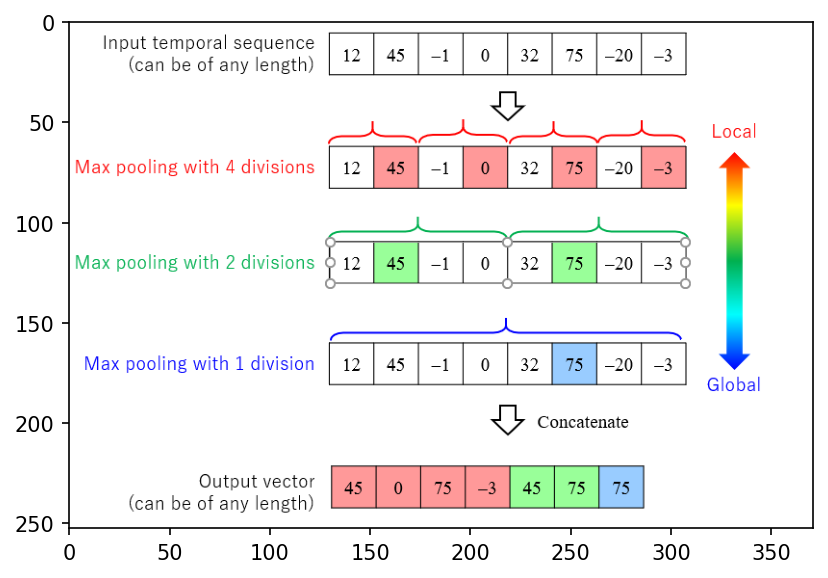

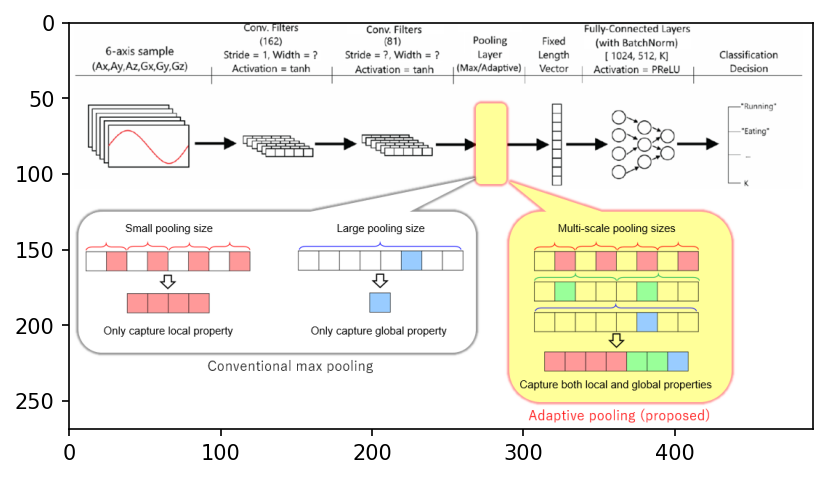

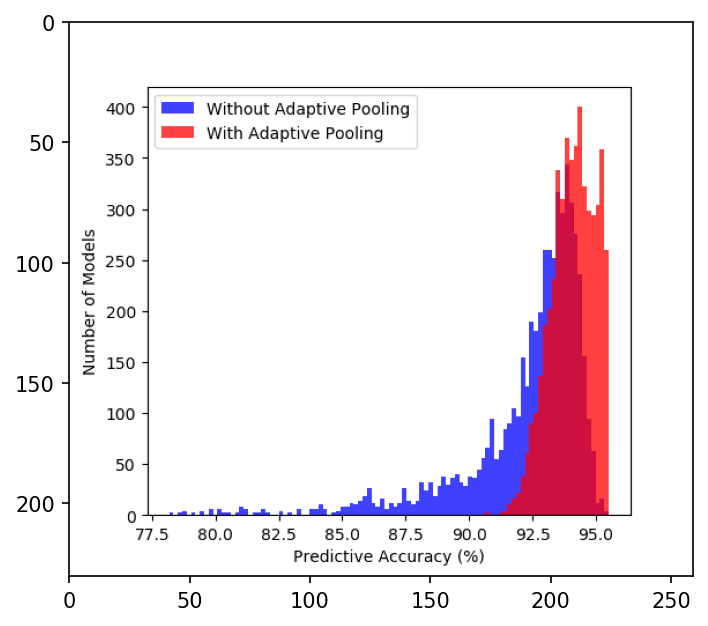

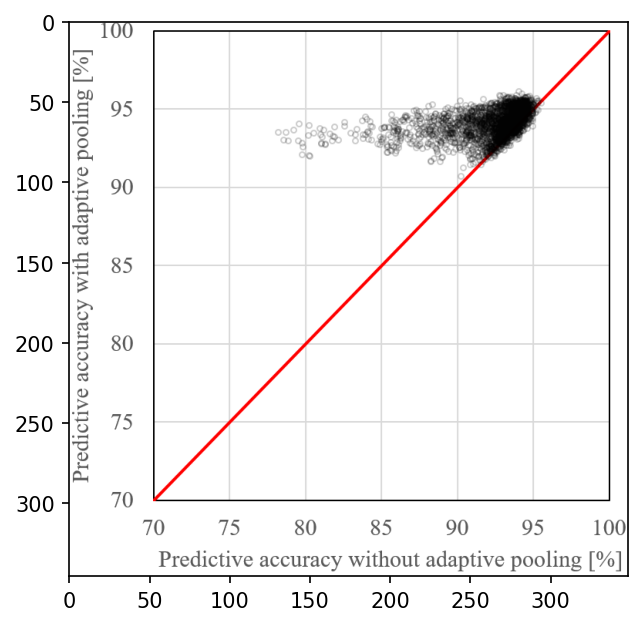

In [17]:
page_dict=extract_text_images_tables(url,download=False)

In [18]:
page_dict

[{'page': 1,
  'img_lst': [],
  'img_cnt': 0,
  'img_npy_lst': [],
  'tables': [],
  'text': 'Adaptive Pooling Is All You Need: An Empirical\nStudy on Hyperparameter-insensitive Human Action\nRecognition Using Wearable Sensors\nMubarak G. Abdu-Aguye\nDepartment of Computer Engineering\nAhmadu Bello University\nZaria, Nigeria\nmubarak.abduaguye@ejust.edu.eg\nWalid Gomaa\nComputer Science and Engineering\nEgypt-Japan University of Science and Technology\nNew Borg el-Arab, Egypt\nwalid.gomaa@ejust.edu.eg\nYasushi Makihara\nISIR\nOsaka University\nOsaka, Japan\nmakihara@am.sanken.osaka-u.ac.jp\nYasushi Yagi\nISIR\nOsaka University\nOsaka, Japan\nyagi@am.sanken.osaka-u.ac.jp\nAbstract—A plethora of techniques have been proposed in\nhuman action recognition ﬁelds, and particularly deep learning-\nbased methods such as convolutional neural networks (CNNs)\nhave achieved impressive results. Usually, there is need to tune\nhyper-parameters in the deep neural network (e.g., ﬁlter size,\nstride) 

In [134]:
len(doc_per_page_tabs_lst)

1

In [147]:
for i in doc_per_page_tabs_lst:
    df2=i

df2

[                                 Hyperparameter Name  \
 0  Conv1 Size\nConv2 Size\nConv2 Stride\nMaxPool ...   
 1                              Total Configurations:   
 
                                               Values  
 0  2,3,4,5,6,7,8,9,10,11,12,13,14,15\n2,3,4,5,6,7...  
 1                                             87,808  ]

In [149]:
df2.append(df2[0])

In [152]:
df2[1]

,Hyperparameter Name,Values
0,Conv1 Size\nConv2 Size\nConv2 Stride\nMaxPool ...,"2,3,4,5,6,7,8,9,10,11,12,13,14,15\n2,3,4,5,6,7..."
1,Total Configurations:,"87,808"


In [101]:
page = doc[1]
tabs = page.find_tables()  # detect the tables


for i,tab in enumerate(tabs):  # iterate over all tables
    for cell in tab.header.cells:
        page.draw_rect(cell,color=fitz.pdfcolor["red"],width=0.3)
    page.draw_rect(tab.bbox,color=fitz.pdfcolor["green"])
    print(f"Table {i} column names: {tab.header.names}, external: {tab.header.external}")
    
show_image(page, f"Table & Header BBoxes")

TypeError: object of type 'TableFinder' has no len()

In [107]:
page = doc[1]
tabs = page.find_tables()  # detect the tables
tabs.tables == []

True

In [10]:
# choose the second table for conversion to a DataFrame
tab = tabs[0]
df = tab.to_pandas()
# show the DataFrame
df

,Hyperparameter Name,Values
0,Conv1 Size\nConv2 Size\nConv2 Stride\nMaxPool ...,"2,3,4,5,6,7,8,9,10,11,12,13,14,15\n2,3,4,5,6,7..."
1,Total Configurations:,"87,808"
